# Capture Signal

In [ ]:
import serial

import matplotlib.pyplot as plt

import time

serial_data = serial.Serial("/dev/ttyACM1", 9600)

serial_list = []


def capture_signal():
    # time in seconds to capture the ecg signal
    capture_time = 5

    t_end = time.time() + capture_time
    while time.time() < t_end:
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            serial_list.append(int(serial_string))


def output_signal_to_csv():
    with open("presentation_ecg.csv", "w") as ecg_file:
        ecg_file.write("voltage,\n")
        for item in serial_list:
            ecg_file.write("%s,\n" % item)
        ecg_file.write("0,")

time.sleep(2)
capture_signal()
output_signal_to_csv()


# Filter Signal

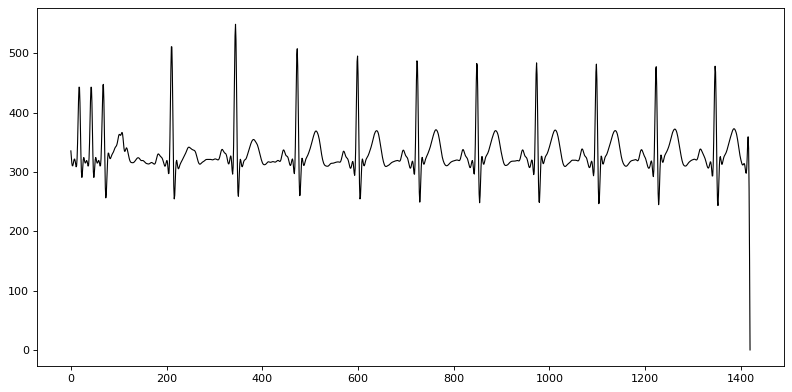

In [18]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")

b, a = signal.butter(4, 0.25, analog=False)

data = pd.read_csv("project_presentation.csv")
sig = data["voltage"]

sig_ff = signal.filtfilt(b, a, sig)

plt.plot(sig_ff, color="#000000", linewidth=1)
# plt.axis('off')

plt.savefig("project_presentation.png", dpi=150, quality=100, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Better R peak dectection

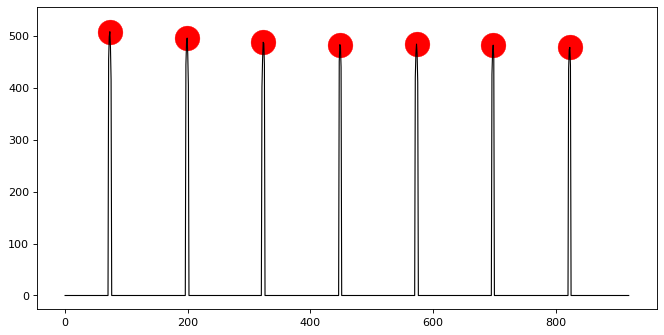

In [25]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema

# voltage = data["voltage"]
threshold = 400
start = 400
end = -100
amended_sig = sig_ff[start:end]
no_of_rows = amended_sig.shape[0]
line_numbers = []
theVoltage = []


for i in range(0, no_of_rows):
    if amended_sig[i] > threshold:
        theVoltage.append(amended_sig[i])
    else:
        theVoltage.append(0)
    line_numbers.append(i)    
    

# trimming noisy signal from start and end
# theVoltage = theVoltage[start:end]
# line_numbers = line_numbers[start:end]
    
    
ecg_plot = np.concatenate((theVoltage, line_numbers))

r_peaks = argrelextrema(ecg_plot, np.greater, order=5)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(theVoltage, color="#000000", linewidth=1)

plt.scatter(r_peaks[0],ecg_plot[r_peaks[0]],linewidth=0.3, s=500, c='r')

In [26]:
r_peaks

(array([ 73, 199, 323, 448, 573, 698, 823]),)

# Segmenting signal

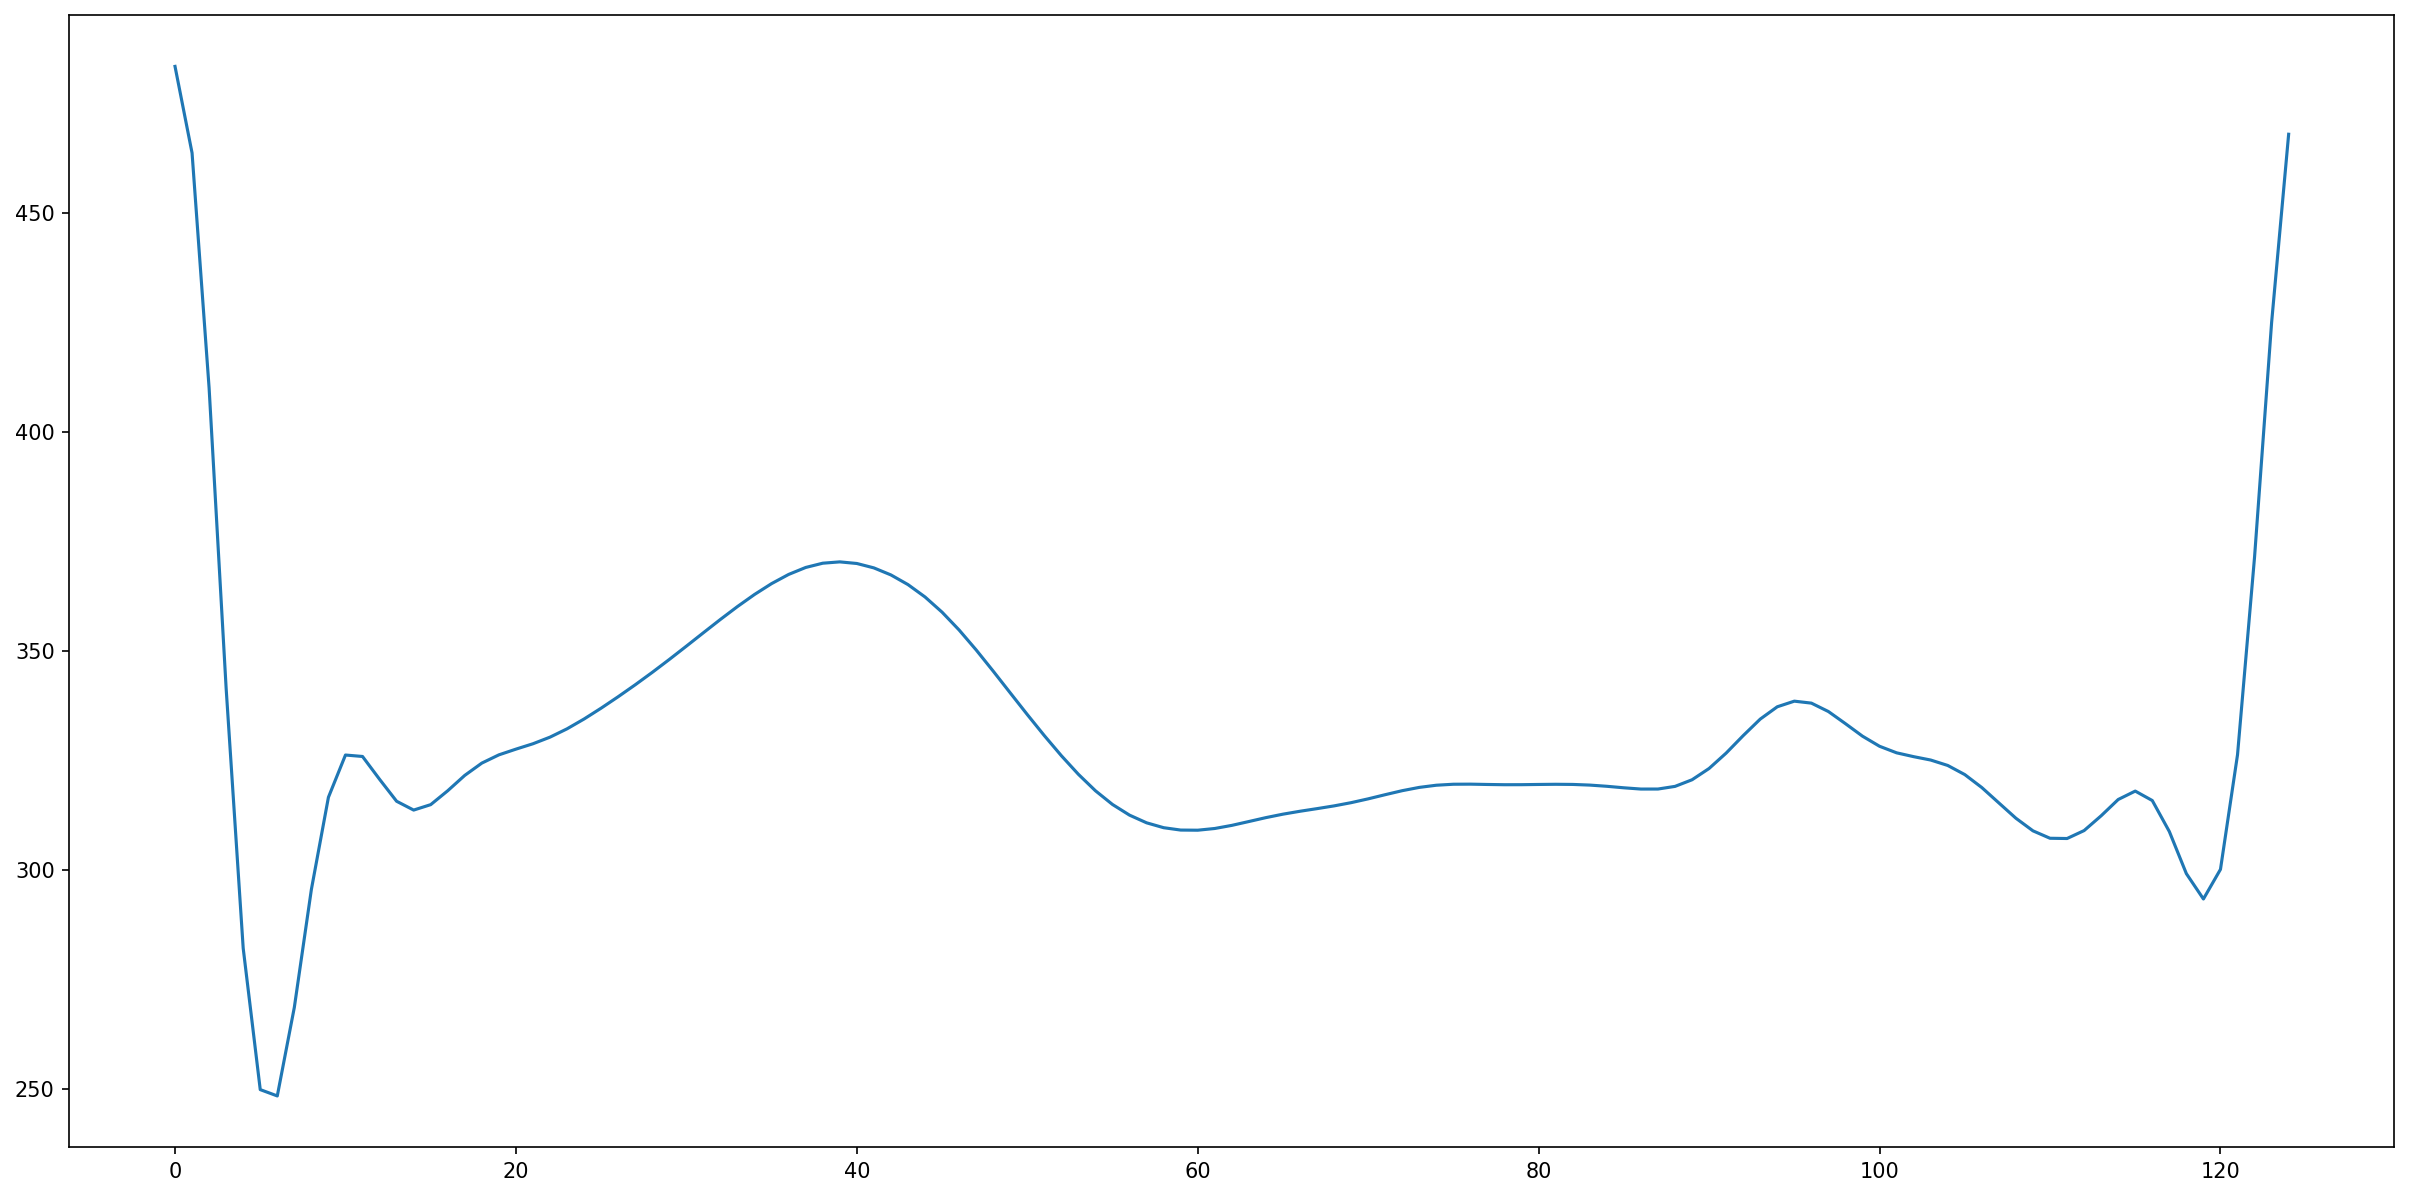

In [56]:
r_peaks_list  = str(r_peaks)

r_peaks_list = r_peaks_list.split() #split string into a list
del r_peaks_list[0] # first element is a string and of no use
r_peaks_list[-1] = (r_peaks_list[-1].replace(']),)', ',')) # last element has a string at end

for i in range(0, len(r_peaks_list)):
    r_peaks_list[i] = (r_peaks_list[i].replace(',',''))
    r_peaks_list[i] = int(r_peaks_list[i])

combined_creation = True
# plt.figure(num=None, figsize=(20,10), dpi=150)
for i in range (0, 5):
    segment_start = r_peaks_list[i]
    segment_end = r_peaks_list[i+1]
    
    extracted_segment = amended_sig[segment_start:segment_end]
    if combined_creation:
        combined_seg = np.zeros(len(extracted_segment) + 100)
        combined_creation = False
    for j in range(0,len(extracted_segment)):
        combined_seg[j] =  combined_seg[j] + extracted_segment[j]
    
for k in range (0, len(combined_seg)):
    if combined_seg[k] != 0:
        combined_seg[k] = (combined_seg[k] / 5)

combined_seg = np.trim_zeros(combined_seg)
# plt.plot(extracted_segment)  
# plt.savefig("combined_test.png", dpi=150, quality=100, bbox_inches='tight') 
    
#     plt.plot(extracted_segment)   
# plt.savefig("segment_test.png", dpi=150, quality=100, bbox_inches='tight')

In [55]:
combined_seg

array([491.11988983, 473.9803823 , 422.54751512, 354.70480838,
       294.03088482, 258.41077652, 252.66636663, 268.92326343,
       293.16923183, 313.10834389, 322.89048856, 323.29507838,
       318.81806697, 314.18599004, 312.16209974, 313.15341951,
       316.0573571 , 319.42898562, 322.29131572, 324.37293511,
       325.91429888, 327.32068692, 328.89672735, 330.7592941 ,
       332.88766672, 335.21365076, 337.68574839, 340.29233224,
       343.05026619, 345.97201924, 349.03438669, 352.17055958,
       355.28775503, 358.29508185, 361.12149508, 363.7079982 ,
       365.97761759, 367.81522118, 369.08949768, 369.70635096,
       369.64484806, 368.94194369, 367.639636  , 365.7359818 ,
       363.17565986, 359.89195795, 355.8787249 , 351.24356488,
       346.20264426, 341.02235785, 335.9485024 , 331.16005535,
       326.76126687, 322.80606019, 319.33330318, 316.3860859 ,
       314.00516078, 312.21055407, 310.98704596, 310.27633232,
       309.97925107, 309.9774058 , 310.1691927 , 310.49

# Finding R Peaks

In [ ]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema

# data = pd.read_csv("project_presentation.csv")

# data = data[400:-100]


no_of_rows = data.shape[0]

# voltage = data["voltage"]
line_numbers = []

for i in range(0, no_of_rows):
    line_numbers.append(i)
    
ecg_plot = np.concatenate((sig_ff, line_numbers))

c_max_index = argrelextrema(ecg_plot, np.greater, order=45)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(sig_ff, color="#000000", linewidth=1)


plt.scatter(c_max_index[0],ecg_plot[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [ ]:
import numpy as np
import cv2 as cv
              
    
def find_peaks(peaks_list, y, x):
    for y_cors in range (y,image_y):
        for x_cors in range (x, image_x):
            if img[y_cors, x_cors] == 0:
                x = x_cors + 200
                if {y_cors, x_cors} not in peaks_list:
                    peaks_list.append({y_cors, x_cors})
                print(peaks_list)
                return x
    return x


img = cv.imread('project_presentation.png', 0)
image_x = (img.shape[1])
image_y = (img.shape[0])
x = 0
y = 0
peaks_list = []
keep_looping = True

while keep_looping:
    if x < image_x:
        x = (find_peaks(peaks_list, y, x))
    else:
        keep_looping = False

cv.imshow('image', img)
cv.waitKey(0) & 0xFF
cv.destroyAllWindows()

[{378, 39}]
[{378, 39}, {97, 660}]
[{378, 39}, {97, 660}, {939, 103}]
[{378, 39}, {97, 660}, {939, 103}, {1153, 205}]


In [30]:
type(voltage)

pandas.core.series.Series

In [31]:
voltage

1       327
2       311
3       307
4       310
5       316
       ... 
1315    337
1316    335
1317    337
1318    337
1319    333
Name: voltage, Length: 1319, dtype: int64

In [19]:
import csv
import time
import serial

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1"]

with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
        }

        csv_writer.writerow(info)

        x_value += 1
#         total_1 = total_1 + random.randint(-6, 8)
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            total_1 = serial_string

KeyboardInterrupt: 

In [ ]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
#     y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
#     plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()